# Assignment 1: Transformers & Generative Pretrained Transformer (GPT)

The goal of this assignment is to master the **Transformer architecture**, which is the engine behind modern Large Language Models (LLMs) such as ChatGPT, Gemini, and DeepSeek. We will implement a compact, decoder-only transformer from scratch, closely following the [NanoGPT](https://github.com/karpathy/nanoGPT) project by Andrej Karpathy.

We will train this model on textual figure captions from the [Open-MELON dataset](https://huggingface.co/datasets/MartiHan/Open-MELON-VL-2.5K), which contains descriptions of histopathology images (specifically melanocytic lesions). After training, your model will be able to generate **synthetic captions** when prompted with a short starting sequence. Note that at this point we do not associate these captions with image data. We will go into vision-language models that can jointly model both image and text data in the next assignment. For now, we focus on text, but, as you will see in Assignment 2, extending the Transformer architecture to model image data is a straightforward extension. 

This dataset was specifically prepared for this course (work done by Martina Hanusova). While this dataset is certainly not as large as the massive corpora used to train ChatGPT and consists of open-access figures and captions rather than medical images and clinical reports, it offers two  advantages. First, the content is highly dense with relevant medical terminology, which makes the training process efficient. Second, because we are using public data from medical publications, we avoid the complex legal and ethical hurdles associated with handling private patient data.

## Preparation

We start with the assumption that you have a solid understanding of fundamental machine learning and neural network concepts, such as linear regression, gradient descent, backpropagation, and loss functions; if you need a refresher, please review materials from the previous courses (e.g. 8BB020 Introduction to Machine Learning). You must prepare for this assignment by mastering the Transformer architecture, specifically understanding self-attention mechanisms in neural networks and the distinction between encoder models and the decoder-only architectures (like GPT) used for generative tasks.

Beyond the architecture, you must also familiarize yourself with the basics of Computational Pathology to understand the medical context of our dataset (we will be generating captions for H&E stained histopathology images).

This is a list of materials that you can use to learn the topic of Transformers and prepare for the flipped classrooms:

| Type | Length | Link | Why is it relevant? |
| :--- | :--- | :--- | :--- |
| Video | 8 min. | [Large Language Models explained briefly (3Blue1Brown)](https://www.youtube.com/watch?v=LPZh9BOjkQs&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=5) | This video from the [3Blue1Brown](https://www.3blue1brown.com/) YouTube channel was originally made as an exhibit for Computer History Museum. It gives a very "gentle" and high-level introduction of the mechanics of how (large) language models work and are trained. This includes the concept of autoregressive modelling (predicting the next word in a sequence), (pre)-training of large language models from text datasets (the "P" in GPT stands for "pretrained") as well as reinforcement learning with human feedback. While in this course we will keep to training of (relatively small) language models, it is good to have the complete picture.  The entire 3Blue1Brown channel is a very high-quality source of educational content on a wide range of topics. In fact, the entire [Neural networks]() playlist is highly recommended, also as a refresher to more fundamental concepts such as backpropagation. | 
| Paper | 10 pg. | [Attention Is All You Need (Vaswani et al.)](https://arxiv.org/abs/1706.03762) | This is the paper that introduced the Transformer architecture to the world. It is a must-read for anyone interested in the subject. The paper is relatively short (10 pages without references), however it can be a bit "dense" for beginners. That is ok, as the most important thing to understand is the tokenization of text and the self-attention mechanism. Both of these concepts are also covered in the next two recommended videos so it is best that you iterate between watching the videos and reading the paper. Note that one thing that might be particularly confusing is that the neural network architecture in this paper has both an encoder and decoder part. This is because the application that is addressed here is natural language translation (machine translation). In this setup, the encoder part is used to encode the text in the original language and the decoder is used to translate this encoded text into the target language. In this course we will focus on decoder-only architectures, which are used for generative tasks such as text generation. | 
| Video | 27 min. | [Transformers, the tech behind LLMs (3Blue1Brown)](https://www.youtube.com/watch?v=wjZofJX0v4M&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) | This video provides a visual overview of the data flow within a Transformer, specifically focusing on GPT-style (decoder-only) models. It explains tokenization, embeddings (how vectors encode semantic meaning), and the final softmax layer used to predict the next token. It serves as a high-level roadmap of the architecture before diving into specific components in the next video. |
| Video | 26 min. | [Attention in transformers (3Blue1Brown)](https://www.youtube.com/watch?v=eMlx5fFNoYc&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) |This chapter breaks down the Attention mechanism (Self-Attention), which is the core innovation of the Transformer. It details the Query, Key, and Value (Q, K, V) matrices and visualizes how the attention pattern is calculated via dot products. It explains how the model uses these to "attend" to relevant context (updating word meanings based on surrounding words) and introduces concepts like multi-head attention and masking. |
| Interactive tool | ~25 min. | [Transformer explainer (poloclub)](https://poloclub.github.io/transformer-explainer/)| This is a great interactive tool that explains in steps how transformer models for language work and make predictions. It should take around 25 minutes to go over all the steps in the tool for one example, but it might be useful to spend some more time and look at different examples. | 
| Video | 120 min. | [Let's build GPT: from scratch, in code, spelled out (Andrej Karpathy)](https://www.youtube.com/watch?v=kCc8FmEb1nY) | This video series provides a step-by-step guide to building a GPT-style transformer from scratch. It covers the entire process, from data preparation to model training and evaluation. It is a great resource for understanding the mechanics of how GPT-style models work and how to implement them in code. It is **optional** in a sense that it is not required for the exercises, but might be very useful for understanding the dataset and **formulating an research question for the open assignment.** |
| Paper | 11 pg. | [From melanocytes to melanomas (Shain et al.)](https://www.nature.com/articles/nrc.2016.37) | This review paper provides a good overview of the biology of melanocytic lesions and the histopathology of melanocytic lesions. It is a good resource to understand the medical context of our dataset.|
| Paper | 35 pg. | [Large Language Models: A Survey (Minaee et al.)](https://arxiv.org/abs/2402.06196) | This survey paper is a good resource to get the "big picture" of various large language models and how they differ in their methodology and implementation. Treat this resource as **optional**. It is not required to complete the exercises in this assignments, but it is very useful to get a broader understanding of the state-of-the-art, which you might find useful for **generating ideas for the open assignment** or future projects (e.g. for your BEP or MSc projects). |

## Exercises: Theory

⚠️ *The answers to the theory exercises are NOT to be submitted as part of the assignment deliverables. They can, however, be used to check your understanding of the materials and to prepare for the flipped classroom. You CAN include your discussion about the exercises in the flipped classroom log.*

#### Exercise T.1 

A GPT model is autoregressive, meaning it generates text strictly one token at a time. It predicts the first next token, appends it to the sequence, and uses that updated sequence to predict the second token. This is a serial process.

In contrast, many other neural networks process their entire input in parallel (all at once) to maximize speed.

If we modified the architecture to predict every token in a paragraph simultaneously (in parallel) rather than one by one, is the resulting text likely to be grammatically coherent? Explain your reasoning.

#### Exercise T.2

In this assignment (as you will see later), we define tokens to be individual characters (e.g., 'a', 'b', 'c'). This keeps our vocabulary small and the implementation simple. In contrast, the standard practice for modern Large Language Models is to use sub-word tokenization, which groups frequent character patterns into single tokens to process text more efficiently. 

Assume that we take this concept one step further and define tokens to be entire sentences. What would be the consequence of this when generating text?

#### Exercise T.3

The core concept of a Transformer is self-attention, which allows a token to look at other tokens to gather context. In a Decoder-only model (like GPT), we apply a specific constraint called Causal Self-Attention (or "Masked" Self-Attention) during training. This forces every token to look only at itself and the tokens that came before it.

This is different from Encoder models, which use Bidirectional Attention, allowing tokens to see the entire sentence (past and future) at once.

Assume that during training, we feed the entire completed sentence into the model at once. Will this model still be useful for generating text? Explain your reasoning. 

#### Exercise T.4 

Decoder-only models (like GPT) are mathematically optimized to maximize the probability of the text sequence. This means that if they were trained with medical report data, they strive to generate text that "looks" and "sounds" like a real medical report. They are not optimized to check for factual truth.

Assume that your trained model generates a synthetic pathology caption that includes specific quantitative details: "The sample shows a high mitotic rate of 8 figures per 10 HPF."

Why is this specific type of error (a plausible-sounding number) significantly more dangerous to a clinician than if the model had just generated obvious gibberish (e.g., "rate figures high 8 10" )?

#### Exercise T.5 

If we want to train a model that generates a pathology report based on medical imaging data, we would need a joint vision-language model. We will touch on this in the next assignment. For now, assume that we want to generate a report based on some medical test or observations that we can represent as text data and make them part of the starting sequence that we use to prompt further generation.

Consider the following example of how such a model would operate:

Input Sequence (Provided by User): "Clinical Indication: Patient has a rapidly growing, asymmetrical black lesion on the left shoulder. Rule out Melanoma. Gross Description: ..."

Generated Continuation (Predicted by Model): "...Specimen consists of a skin ellipse measuring 2.0 x 1.5 cm. Microscopic examination reveals a proliferation of atypical melanocytes arranged in nests at the dermo-epidermal junction. There is upward migration of cells (pagetoid spread). DIAGNOSIS: MALIGNANT MELANOMA."

Would such a model be useful in clinical practice? Motivate your answer.


## Before you Begin...

### Dataset

[Open-MELON-VL-2.5K](https://huggingface.co/datasets/MartiHan/Open-MELON-VL-2.5K) is a vision–language dataset of 2,500 Hematoxylin & Eosin-stained histopathology images of melanocytic lesions with captions, curated from PubMed open-access publications. It is hosted on Hugging Face, which is a platform for sharing and accessing datasets.

### GPU Usage

For the assignments, we recommend to use GPU for faster model training or evaluation.
[Google Colab](https://colab.research.google.com) provides a free service for hosting Jupyter notebooks allowing to access a remote Tesla T4 GPU.
Please keep in mind the Colab free tier GPU usage limits (approximately 1.5 hours per day, but may be higher or lower depending on your usage history).

To enable a GPU in Colab, navigate to the menu panel -> `Runtime` -> `Change runtime type` -> `T4 GPU` -> `Save`.
When you are done with your work, detach the current runtime session and download the Jupyter notebook file locally.

⚠️ *Note that all assignments are designed to also be doable on the CPUs of your laptops, so you do not have to use Colab or a GPU.* 

## Training a Generative Language Model

### Install Required Packages

This notebook uses:
- `numpy` for basic math operations
- `datasets` to load captions from Hugging Face
- PyTorch to implement NanoGPT-like model + training loop
- `tqdm` for displaying progress bars

All other used packages should already be available on your system. If you need help with setting up your Python environment, please ask help from your assigned TA.

Let's install the required packages:

In [44]:
!pip install numpy datasets torch tqdm

### Import the Libraries

The following Python modules will be used for our NanoGPT implementation.

In [45]:
import os
import math
import random
from dataclasses import dataclass
from typing import List, Tuple

import numpy as np

from datasets import load_dataset, concatenate_datasets

import torch
import torch.nn as nn
import torch.nn.functional as F

from tqdm.auto import tqdm

import matplotlib.pyplot as plt

### Use local GPU

Use GPU if available 

In [46]:
if torch.cuda.is_available():
    device = torch.device("cuda")  # Windows/Linux
    print("gpuuuuuuuuu")

elif torch.backends.mps.is_available():
    device = torch.device("mps")  # MacOS
else:
    device = torch.device("cpu")
    print("cpuuuuu")

gpuuuuuuuuu


### Check what PyTorch thinks I installed


In [47]:
import torch
print("torch:", torch.__version__)
print("cuda available:", torch.cuda.is_available())
print("torch.version.cuda:", torch.version.cuda)


torch: 2.5.1
cuda available: True
torch.version.cuda: 12.1


### “How to enable GPU (CUDA) in this environment” (only if cpuuuuuu and torch.version.cuda: None are printed above)
Enable GPU (CUDA) for PyTorch on Windows (Conda env)

1. Open Anaconda Prompt (or terminal) and activate the course environment:

conda activate (your created enviroment)

2. Remove any CPU-only PyTorch packages (safe even if some are missing):

pip uninstall -y torch torchvision torchaudio


3. Install CUDA-enabled PyTorch (recommended for our laptops):

conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia


4. Restart the Jupyter kernel / VS Code notebook kernel
This is important — otherwise the notebook may still use the old install.

5. Verify CUDA works (run the check cell above).
You should see:

cuda available: True

torch.version.cuda: 12.1

### Load the Dataset

In the code block below, [Open-MELON dataset](https://huggingface.co/datasets/MartiHan/Open-MELON-VL-2.5K) is loaded using HuggingFace loaders and the figure captions are concatenated into one big training corpus.


In [48]:
# ds_dict is a list of ['train', 'validation', 'test'] splits
ds_dict = load_dataset("MartiHan/Open-MELON-VL-2.5K")

# in this example, all 3 splits are concatenated
# validation set is later drawn from the text chunks of 'block_size'
ds_all = concatenate_datasets(list(ds_dict.values()))

captions = [str(x) for x in ds_all["caption"]]
print("Captions:", len(captions))
print("Example caption:", captions[0])


Captions: 2499
Example caption: Small bowel polyps showing malignant cells located at the lamina propria and submucosa. The image is stained with hematoxylin and eosin (H&E) at × 4 magnification.


#### Preprocess the Training Text

We join separate captions with `<ENDC>` separator. This helps the model learn boundaries.


In [49]:
SEP = "\n<ENDC>\n"
text = SEP.join(captions)

# Print the total number of characters in the dataset
print("Training text length (chars):", len(text))

# Print the first 1000 characters of the constructed text corpus
print(text[:1000])

Training text length (chars): 971654
Small bowel polyps showing malignant cells located at the lamina propria and submucosa. The image is stained with hematoxylin and eosin (H&E) at × 4 magnification.
<ENDC>
Histopathology of small bowel polyps showing malignant cells arranged in diffuse sheets with the presence of intracytoplasmic and extracellular pigments. The image is stained with hematoxylin and eosin (H&E) at × 20 magnification.
<ENDC>
Small bowel polyps showing malignant cells located at the lamina propria and submucosa. The image is stained with hematoxylin and eosin (H&E) at × 4 magnification.
<ENDC>
Histopathology showing spindle cell uveal melanoma from a left eye choroidal pigmented malignant melanoma, classified as invasive in the ciliary body and cornea (stage IIIB, pT4bN0M0). The microscopic examination reveals a dense cell proliferation composed of small and medium fusiform (spindle) cells, along with evident pigment production. The tissue fragments were embedded in par

### Character-level Tokenizer

We build a vocabulary of unique characters from the training text. 


In [50]:
chars = sorted(list(set(text)))
vocab_size = len(chars)

# mapping of characters to numerical tokens (by their order in vocabulary alphabet)
stoi = {ch:i for i,ch in enumerate(chars)}

# mapping of numerical tokens back to characters
itos = {i:ch for i,ch in enumerate(chars)}

def encode(s: str):
    """
    Converts character to a token.
    Input: character (e.g. 'A')
    Output: numerical token (e.g. 65)
    """
    return [stoi[c] for c in s]

def decode(ids):
    """
    Converts token to a character.
    Input: numerical token (e.g. 65)
    Output: character (e.g. 'A')
    """
    return "".join(itos[i] for i in ids)

Let's print some information about the vocabulary that we have created as well as some examples of encoding words. 

In [51]:
print("Size of the vocabulary:", vocab_size)
print("Preview of the vocabulary:", chars)

examples = ["male", "malignant", "melanoma", "malignant melanoma"]

print("\n--- Encoding Examples ---")

for word in examples:
    tokens = encode(word)
    
    # Create a visual mapping of Char -> Token
    mapping_str = ", ".join([f"'{c}':{t}" for c, t in zip(word, tokens)])
    
    print(f"String:  {word}")
    print(f"Tokens:  {tokens}")
    print(f"Mapping: {mapping_str}")
    print("-" * 40)


Size of the vocabulary: 109
Preview of the vocabulary: ['\n', ' ', '"', '#', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '^', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0', '§', '°', '±', '²', '´', 'µ', '×', 'í', 'α', 'μ', '\u2005', '\u2009', '‐', '–', '‘', '’', '“', '”', '→', '⇒', '≤', '≥', '⊷']

--- Encoding Examples ---
String:  male
Tokens:  [71, 59, 70, 63]
Mapping: 'm':71, 'a':59, 'l':70, 'e':63
----------------------------------------
String:  malignant
Tokens:  [71, 59, 70, 67, 65, 72, 59, 72, 78]
Mapping: 'm':71, 'a':59, 'l':70, 'i':67, 'g':65, 'n':72, 'a':59, 'n':72, 't':78
----------------------------------------
String:  melanoma
Tokens:  [71, 63, 70, 59, 72, 73,

Now we encode the text corpus and store it as PyTorch array. The first 90% of this array will be used for training, while the remaining 10% will be used for validation.

In [52]:

data = torch.tensor(encode(text), dtype=torch.long)

n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

def get_batch(split: str):
    src = train_data if split == "train" else val_data
    ix = torch.randint(len(src) - cfg.block_size - 1, (cfg.batch_size,))
    x = torch.stack([src[i:i+cfg.block_size] for i in ix])
    y = torch.stack([src[i+1:i+cfg.block_size+1] for i in ix])
    return x.to(cfg.device), y.to(cfg.device)

print("Train tokens:", train_data.numel(), "Val tokens:", val_data.numel())

Train tokens: 874488 Val tokens: 97166


### Model Training Configurations

The following configuration classes define the size of the transformer model and how it is trained. These hyperparameters control model capacity, context length, training stability, and computational cost. You can later use this to perform different experiments, e.g. comparing models of different size (capacity) and context length. 

**Model configuration**

- `vocab_size` - number of unique tokens the model can process. In this assignment, tokens are individual characters, so the vocabulary size equals the number of distinct characters in the training corpus.

- `block_size` - the context window length, i.e. the maximum number of tokens the model can see at once. During training and generation, the model predicts the next token using only the previous block_size tokens. A larger block size allows the model to capture longer-range dependencies but increases memory and computation requirements.

- `n_layer` - number of stacked transformer decoder blocks. More layers increase model depth and expressiveness but also training time and risk of overfitting.

- `n_head` - number of attention heads in each self-attention layer. Multiple heads allow the model to attend to different aspects of the context simultaneously (e.g. syntax, formatting, or local patterns).

- `n_embd` - dimensionality of token embeddings and hidden representations. Larger embeddings allow richer representations but increase memory usage and compute cost.

- `dropout` - dropout probability used during training as a regularization technique. It helps prevent overfitting by randomly deactivating neurons. Dropout is disabled for CPU training to keep behavior deterministic and training stable.

**Training configuration**
- `batch_size` - Number of training sequences processed in parallel during one optimization step. Larger batches improve gradient stability but require more memory.

- `max_iters` - total number of training iterations (parameter update steps).

- `eval_interval` - number of training iterations between evaluations on the validation set.

- `eval_iters` - number of mini-batches used to estimate training and validation loss during evaluation.

- `lr (learning rate)` - step size used by the optimizer when updating model parameters. This is one of the most sensitive hyperparameters for training stability.

- `weight_decay` - regularization term that penalizes large weights and helps reduce overfitting.

- `device` - specifies whether training runs on CPU or GPU. Smaller model and batch sizes are used automatically when no GPU is available.


In [53]:
##############################################################################################
### Model configuration (number of layers, number of heads, embedding dimensions, dropout) ###
##############################################################################################

# Configuration for GPU
@dataclass
class ModelConfigGPU:
    vocab_size: int
    block_size: int
    n_layer: int = 4
    n_head: int = 4
    n_embd: int = 256
    dropout: float = 0.2

# Configuration for CPU
@dataclass
class ModelConfigCPU:
    vocab_size: int
    block_size: int
    n_layer: int = 4
    n_head: int = 4
    n_embd: int = 128
    dropout: float = 0

########################################################################################################
### Model configuration (block size, batch size, evaluation iterations, learning rate, weight decay) ###
########################################################################################################

# Configuration for GPU
@dataclass
class TrainConfigGPU:
    block_size: int = 64
    batch_size: int = 12
    max_iters: int = 2000
    eval_interval: int = 200
    eval_iters: int = 50
    lr: float = 1e-3
    weight_decay: float = 0.1
    device: str = "cuda"

# Configuration for CPU
@dataclass
class TrainConfigCPU:
    block_size: int = 64
    batch_size: int = 12
    max_iters: int = 2000
    eval_interval: int = 200
    eval_iters: int = 50
    lr: float = 1e-3
    weight_decay: float = 0.1
    device: str = "cpu"
    compile: bool = False


# Automatically select suitable configuration based on GPU detection
if torch.cuda.is_available():
  ModelConfig = ModelConfigGPU
  TrainConfig = TrainConfigGPU
else:
  ModelConfig = ModelConfigCPU
  TrainConfig = TrainConfigCPU


### Building the NanoGPT Model

The model begins with token embeddings, which map character indices to dense vectors, and positional embeddings, which encode the order of tokens within a fixed context window (`block_size`). These embeddings are added together and passed through a stack of transformer decoder blocks.

Each decoder block consists of two main submodules: causal self-attention and a feed-forward network (MLP). Causal self-attention allows each token to attend only to previous tokens by applying a causal mask, ensuring that the model cannot access future information during training or generation. Multiple attention heads are used so that the model can focus on different aspects of the context in parallel. The MLP applies a non-linear transformation independently at each position, complementing the attention mechanism. Layer normalization and residual connections are used throughout to stabilize training and preserve information flow.


In [54]:
class CausalSelfAttention(nn.Module):
    def __init__(self, c: ModelConfig):
        super().__init__()
        assert c.n_embd % c.n_head == 0
        self.n_head = c.n_head
        self.head_dim = c.n_embd // c.n_head

        self.qkv = nn.Linear(c.n_embd, 3 * c.n_embd, bias=False)
        self.proj = nn.Linear(c.n_embd, c.n_embd, bias=False)
        self.dropout = nn.Dropout(c.dropout)

        mask = torch.tril(torch.ones(c.block_size, c.block_size)).view(1, 1, c.block_size, c.block_size)
        self.register_buffer("mask", mask)

    def forward(self, x):
        B, T, C = x.shape
        qkv = self.qkv(x)
        q, k, v = qkv.split(C, dim=2)

        q = q.view(B, T, self.n_head, self.head_dim).transpose(1, 2)
        k = k.view(B, T, self.n_head, self.head_dim).transpose(1, 2)
        v = v.view(B, T, self.n_head, self.head_dim).transpose(1, 2)

        att = (q @ k.transpose(-2, -1)) / math.sqrt(self.head_dim)
        att = att.masked_fill(self.mask[:, :, :T, :T] == 0, float("-inf"))
        att = F.softmax(att, dim=-1)
        att = self.dropout(att)

        y = att @ v
        y = y.transpose(1, 2).contiguous().view(B, T, C)
        y = self.proj(y)
        y = self.dropout(y)
        return y

class MLP(nn.Module):
    def __init__(self, c: ModelConfig):
        super().__init__()
        self.fc = nn.Linear(c.n_embd, 4 * c.n_embd)
        self.proj = nn.Linear(4 * c.n_embd, c.n_embd)
        self.dropout = nn.Dropout(c.dropout)

    def forward(self, x):
        x = self.fc(x)
        x = F.gelu(x)
        x = self.proj(x)
        x = self.dropout(x)
        return x

class Block(nn.Module):
    def __init__(self, c: ModelConfig):
        super().__init__()
        self.ln1 = nn.LayerNorm(c.n_embd)
        self.attn = CausalSelfAttention(c)
        self.ln2 = nn.LayerNorm(c.n_embd)
        self.mlp = MLP(c)

    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        return x

After passing through all decoder blocks, the model applies a final layer normalization and a linear output head that produces a probability distribution over the vocabulary for the next-token prediction. The training objective is standard cross-entropy loss between the predicted next token and the true next token.

This NanoGPT model contains approximately between 0.8 and 3 million parameters, depending on the configuration. By comparison, GPT-2 contains hundreds of millions of parameters and modern commercial language models contain many billion parameters. Despite this difference in scale, the same architectural principles apply. The total number of parameters is mainly determined by the embedding dimension (`n_embd`), the number of layers (`n_layer`), and the vocabulary size, while the number of attention heads controls how the embedding space is partitioned rather than its overall size.

The model is intentionally kept small so that it can be trained quickly on limited hardware and easily inspected. The goal of this assignment is to understand how transformer components interact, not to achieve state-of-the-art language modeling performance.

In [55]:
class NanoGPT(nn.Module):
    def __init__(self, c: ModelConfig):
        super().__init__()
        self.c = c
        self.tok_emb = nn.Embedding(c.vocab_size, c.n_embd)
        self.pos_emb = nn.Embedding(c.block_size, c.n_embd)
        self.drop = nn.Dropout(c.dropout)
        self.blocks = nn.ModuleList([Block(c) for _ in range(c.n_layer)])
        self.ln_f = nn.LayerNorm(c.n_embd)
        self.head = nn.Linear(c.n_embd, c.vocab_size, bias=False)

        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, (nn.Linear, nn.Embedding)):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)
        if isinstance(module, nn.Linear) and module.bias is not None:
            nn.init.zeros_(module.bias)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        assert T <= self.c.block_size
        pos = torch.arange(0, T, device=idx.device).unsqueeze(0)

        x = self.tok_emb(idx) + self.pos_emb(pos)
        x = self.drop(x)
        for blk in self.blocks:
            x = blk(x)
        x = self.ln_f(x)
        logits = self.head(x)

        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1))
        return logits, loss

cfg = TrainConfig()
mcfg = ModelConfig(vocab_size=vocab_size, block_size=cfg.block_size)

model = NanoGPT(mcfg).to(cfg.device)
print("Parameters:", sum(p.numel() for p in model.parameters())/1e6, "M")


Parameters: 3.227648 M


### Check before training


In [56]:
print("Model device:", next(model.parameters()).device)
xb, yb = get_batch("train")
print("Batch device:", xb.device, yb.device)


Model device: cuda:0
Batch device: cuda:0 cuda:0


### The Training Loop

We use the AdamW optimizer and periodically evaluate on the validation set. The training in Google Colab should take for both the CPU and GPU configurations approximately 4-5 minutes using the baseline configuration.

training: 100%|██████████| 2000/2000 [00:28<00:00, 69.18it/s, train=1.33, val=1.36]


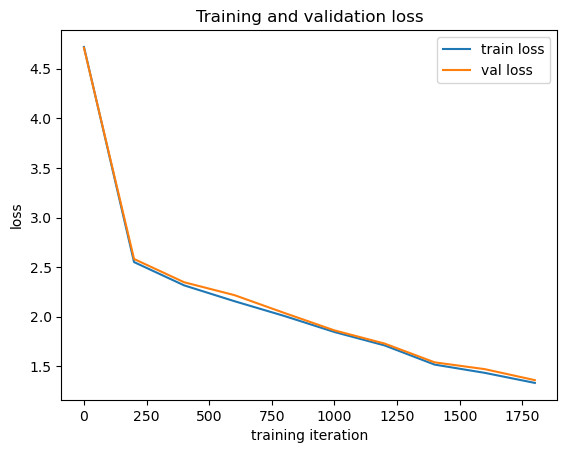

In [57]:
@torch.no_grad()
def estimate_loss():
    model.eval()
    out = {}
    for split in ["train", "val"]:
        losses = torch.zeros(cfg.eval_iters)
        for k in range(cfg.eval_iters):
            X, Y = get_batch(split)
            _, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean().item()
    model.train()
    return out

optimizer = torch.optim.AdamW(model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay)

eval_steps = []
train_curve = []
val_curve = []

model.train()
pbar = tqdm(range(cfg.max_iters), desc="training")
for it in pbar:
    if it % cfg.eval_interval == 0:
        losses = estimate_loss()
        pbar.set_postfix(train=losses["train"], val=losses["val"])

        eval_steps.append(it)
        train_curve.append(losses["train"])
        val_curve.append(losses["val"])

    xb, yb = get_batch("train")
    _, loss = model(xb, yb)

    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


plt.figure()
plt.plot(eval_steps, train_curve, label="train loss")
plt.plot(eval_steps, val_curve, label="val loss")
plt.xlabel("training iteration")
plt.ylabel("loss")
plt.legend()
plt.title("Training and validation loss")
plt.show()

### Text Generation (Sampling)

Now that the model is trained we can put it to use. We generate the synthetic captions starting from `"H&E stained section showing"` string by autoregressively sampling next characters

Hyperparameters:
- `temperature`: higher = more random, lower = less variety
- `top_k`: restrict sampling to top-k most likely chars (lower number eliminates less likely candidates)

In [58]:
@torch.no_grad()
def generate(start: str, max_new_tokens=400, temperature=1.0, top_k=60):
    model.eval()
    idx = torch.tensor([encode(start)], dtype=torch.long, device=cfg.device)

    for _ in range(max_new_tokens):
        idx_cond = idx[:, -cfg.block_size:]
        logits, _ = model(idx_cond)
        logits = logits[:, -1, :] / max(temperature, 1e-6)

        if top_k is not None:
            v, _ = torch.topk(logits, k=min(top_k, logits.size(-1)))
            logits[logits < v[:, [-1]]] = -float("Inf")

        probs = F.softmax(logits, dim=-1)
        next_id = torch.multinomial(probs, num_samples=1)
        idx = torch.cat([idx, next_id], dim=1)

    return decode(idx[0].tolist())

prompt = "H&E stained section showing"

print(generate(prompt, max_new_tokens=500, temperature=0.7, top_k=10))


H&E stained section showing malognification ×10.
<ENDC>
Histopathological exosin shows pigment atypical lesiong a melanoma in a excrsinic magnification ×4000).
<ENDC>
Histopathology of melanoma paneork mitototrphagy of a a papillls prominent and showing a ndermal tiss and cant in the composed and eosinophilic melanoma chartacterized with a s and are inth a nuclei acharcaterizing a andd fa sthology and ecch to epithelial mage cation. The image stained with Hematoxylin and Eosin stained with Hematoxylin and Eosin (H&E) stai


⚠️ *Everything below this line must be submitted as a deliverable for this assignment.*

ℹ️ *Answering the exercises below will require you to implement new code and/or modify the code in cells above. You can add the code directly in the notebook or in separate Python files, depending on your preference. If you write code in separate files, please do not forget to also submit them. The exercises will also require re-running the training, sometimes multiple times. You can split the workload among the group members so things are done more efficiently.*

## Exercises: Practice

#### Exercise 1 

When we created the text corpus, we used the <ENDC> separator to mark the end of a caption. Why is the <ENDC> separator needed? What would happen if you use a model trained without such separator in practice? In order to investigate this, train a model without the <ENDC> separator and compare the results with the model trained with the <ENDC> separator when generating captions.

#### Exercise 2

Train the model and plot training loss and validation loss as a function of training iterations. Modify the following hyperparameters and observe the effect:
- Learning rate
- Batch size
- Evaluation interval

Explain why the observed changes occur. What patterns indicate underfitting? What patterns suggest overfitting or unstable training?

#### Exercise 3

We can reduce the number of tokens by converting all letters to either uppercase or lowercase. Implement this in the preprocessing function and retrain a model. Report your observations on the training and performance of the model.


#### Exercise 4

The dataset contains 2500 figure captions. After encoding and splitting out 10% of the tokens for validation, we are left with 874488 training tokens. Is this also the number of training samples used to train our NanoGPT model? If yes, explain why, if not try to estimate the actual number of training samples.

#### Exercise 5

Text generation depends strongly on the sampling hyperparameters.

Generate captions using at least three different temperature values and two different top_k values. Include at least 10 generated examples per hyperparameter configuration in your report.

For each configuration, comment on the following characteristics of the generated samples:
  - Fluency and structure
  - Repetition or degeneration
  - Factual plausibility (even if the content is synthetic)

Identify optimal configuration of parameters that balances coherence and diversity of the produced synthetic captions, and justify your choice.

## Flipped Classroom Log

ℹ️ *You have to fill this log for both flipped classroom sessions for this assignment. You only fill the log for your group, not together with the group that you interacted with.*

### Instructions

#### Preparation
* **Clients:** List specific theoretical or implementation (code) questions prepared before class.
* **Consultants:** List papers, videos, or code documentation reviewed to prepare. Note, this is not limited to the material listed above, you can add any new material that you used or found useful. 

#### Peer Interaction
* **Clients:** Summarize the solutions or explanations received.
* **Consultants:** Summarize advice given and specific resources shared.



### Logs
#### First Flipped Classroom



ℹ️ *Write the log for your group in this cell. Should be in a narrative style, aim for a max. of 600 words.*

**Role**: Client/Consultant

**Description** of activities during flipped classroom:

#### Second Flipped Classroom


ℹ️ *Write the log for your group in this cell. Should be in a narrative style, aim for a max. of 600 words.*

**Role**: Client/Consultant

**Description** of activities during flipped classroom: